# Dempnstration that GMVRFIT reduces to GMVPFIT (or equivalent) for polynomial cases
<center>Development for a fitting function (greedy+linear based on mvpolyfit and gmvpfit) that handles rational fucntions</center>

In [1]:
# Low-level import 
from numpy import *
from numpy.linalg import pinv,lstsq
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
#
from positive import *

## Package Development (positive/learning.py)

### Setup test data

In [8]:
################################################################################
h = 3
Q = 25
x = h*linspace(-1,1,Q) 
y = h*linspace(-1,1,Q) 
X,Y = meshgrid(x,y)
# X += np.random.random( X.shape )-0.5
# Y += np.random.random( X.shape )-0.5

zfun = lambda xx,yy: 50 + (1.0 + 0.5*xx*yy + xx**2 + yy**2 ) 
numerator_symbols, denominator_symbols = ['01','00','11'],[]

np.random.seed(42)
ns = 0.1*(np.random.random( X.shape )-0.5)
Z = zfun(X,Y) + ns
domain,scalar_range = ndflatten( [X,Y], Z )
################################################################################

### Initiate class object for fitting

In [9]:
foo = mvrfit( domain, scalar_range, numerator_symbols, denominator_symbols, verbose=True )

### Plot using class method

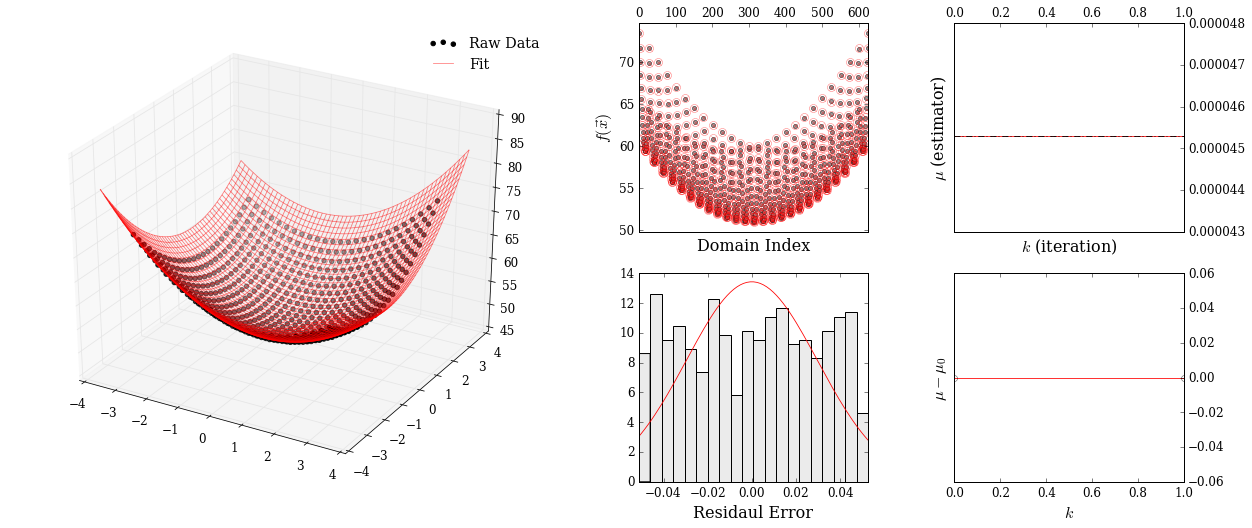

In [10]:
foo.plot()

### Generate python string for fit model

In [13]:
print foo.__str_python__(precision=8)

f = lambda x0,x1: 5.74999156e+01  +  4.41113329e+00 * (  2.26778466e-01*(x0*x0) + 1.13422851e-01*(x0*x1) + 2.26544539e-01*(x1*x1) + -1.47329976e+00 ) 


### Use greedy algorithm

In [14]:
star = gmvrfit( domain, scalar_range, verbose=True )

(gmvrfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
False
&& The current boundary is [('1', True), ('1', False)]
&& The current estimator value is 0.988648

(gmvrfit)>> Now working deg = 2
&& The estimator has changed by -0.981918
&& Degree tempering will continue.
False
&& The current boundary is [('00', True), ('11', True), ('01', True)]
&& The current estimator value is 0.006730

(gmvrfit)>> Now working deg = 3
&& The estimator has changed by 0.000000
&& Degree tempering will continue.
False
&& The current boundary is [('00', True), ('11', True), ('01', True)]
&& The current estimator value is 0.006730

(gmvrfit)>> Now working deg = 4
&& The estimator has changed by -0.000024
&& Degree tempering has completed becuase the estimator has changed by |-0.000024| < 0.010000. The results of the last iteration will be kept.
True
&& The Final boundary is [('00', True), ('11', True), ('01', True)]
&& The Final estimator value is 0.006730


#

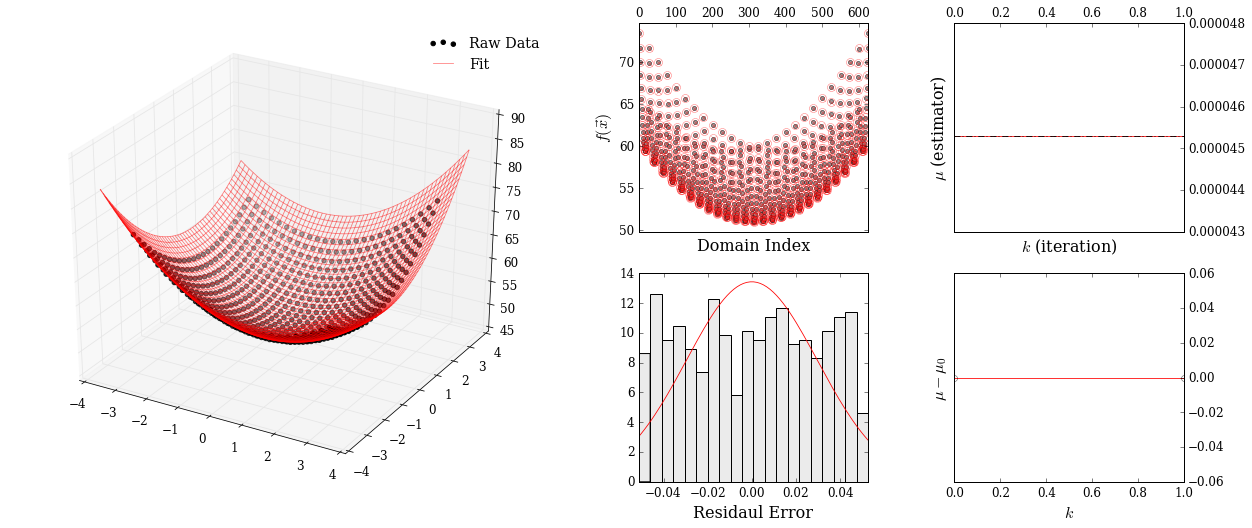

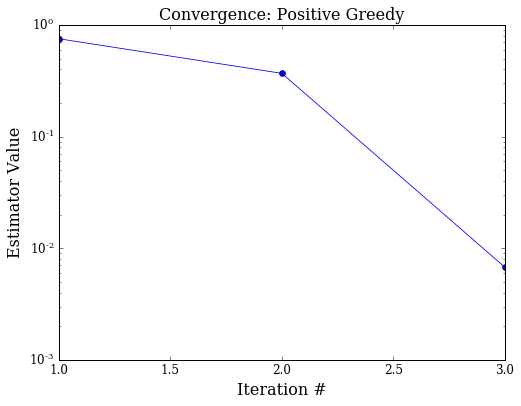

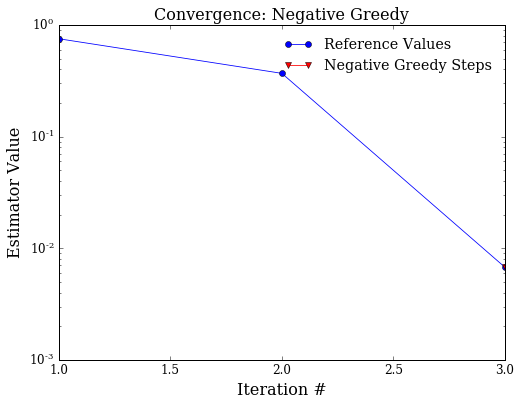

In [15]:
star.plot()
star.bin['pgreedy_result'].plot()
star.bin['ngreedy_result'].plot()